# Exercise: Data Cleaning and Analysis

In practise, data often comes labeled with codes or extreme abbreviations like "Schw_Tr_d_Le_en_W", instead of descriptive column names. Entries are often missing or erroneous, which can introduce errors to machine learning models. Data cleaning serves the purpose of fixing erroneous entries and ensuring the integrity of the dataset, but it does _not_ involve transforming the data in order to prepare it for an algorithm, e.g. via scaling. The exact steps of a data cleaning process depend on the data at hand, but often include making the data humanly interpretable, removing false/incomplete data points, fixing corrupt entries, removing duplicates, etc. 

In [1]:
# For this exercise, only use pandas
import pandas as pd

##### 1. Load "raw_data.csv" into a dataframe and rename all columns to match _Description_ from Table 1.

In [2]:
# Load raw data
df_raw = pd.read_csv("raw_data.csv", sep=";")

# Rename all attributes to match the _description_ in Table 1
df = df_raw.rename(columns={
    "od" : "order_date",
    "dd" : "delivery_date",
    "a6" : "salutation",
    "a7" : "date_of_birth",
    "a8" : "state",
    "a9" : "return_shipment"})

df.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment
0,103939,2012-06-26,?,l,29.9,5.68,4,1900-11-19,8,0
1,11788,2012-04-10,2012-04-11,l,49.9,9.48,4,1953-05-24,7,1
2,96553,2012-06-20,2012-06-21,m,59.9,11.38,4,1954-04-10,11,0
3,100950,2012-06-24,2012-06-26,l,69.9,13.28,4,1965-01-11,7,0
4,223454,2012-09-22,1990-12-31,xxl,89.9,17.08,4,1962-05-11,10,0


##### 2. Correct the data types for all _nominal_ attributes and assign the corresponding labels that are specified under _Comment_ in Table 1.

In [3]:
# There are multiple ways to to this. We use pd.DataFrame.replace() and pass a dict to it

df["salutation"] = df["salutation"].replace({
    2 : "Company",
    3 : "Mr.",
    4 : "Mrs."}).astype("category")

df["state"] = df["state"].replace({
    1 : "BW",
    2 : "BY",
    3 : "BE",
    4 : "BB",
    5 : "HB",
    6 : "HH",
    7 : "HE",
    8 : "MV",
    9 : "NI",
    10 : "NW",
    11 : "RP",
    12 : "SL",
    13 : "SN",
    14 : "ST",
    15 : "SH",
    16 : "TH"}).astype("category")

df["return_shipment"] = df["return_shipment"].replace({
  0 : "No",
  1 : "Yes"}).astype("category")

df.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment
0,103939,2012-06-26,?,l,29.9,5.68,Mrs.,1900-11-19,MV,No
1,11788,2012-04-10,2012-04-11,l,49.9,9.48,Mrs.,1953-05-24,HE,Yes
2,96553,2012-06-20,2012-06-21,m,59.9,11.38,Mrs.,1954-04-10,RP,No
3,100950,2012-06-24,2012-06-26,l,69.9,13.28,Mrs.,1965-01-11,HE,No
4,223454,2012-09-22,1990-12-31,xxl,89.9,17.08,Mrs.,1962-05-11,NW,No


##### 3. Correct the data type of the _ordinal_ attribute "size" and assign the corresponding labels specified under _Comment_ in Table 1.

In [4]:
# Make sure to fix case-sensitivity, otherwise there will be distinct categories created for every different case
df["size"] = df["size"].astype("str").str.upper()  
df["size"] = pd.Series(pd.Categorical(df["size"], categories=["S", "M", "L", "XL", "XXL", "XXXL"], ordered=True))
df.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment
0,103939,2012-06-26,?,L,29.9,5.68,Mrs.,1900-11-19,MV,No
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No


##### 4. Correct the data types for all _date_ attributes. Split "order_date" into separate columns for "weekday", "year", "month", "day" and "quarter".

In [5]:
# Use pandas Datetime format for this. Pass errors="coerce" to convert erroneous values into NaT (not a time)
df["order_date"] = pd.to_datetime(df["order_date"])
df["delivery_date"] = pd.to_datetime(df["delivery_date"], errors="coerce", format="%Y-%m-%d")
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], errors="coerce", format="%Y-%m-%d")

# Make separate columns for order_date
df["order_date_weekday"] = df["order_date"].dt.dayofweek
df["order_date_day"] = df["order_date"].dt.day
df["order_date_month"] = df["order_date"].dt.month
df["order_date_year"] = df["order_date"].dt.year
df["order_date_quarter"] = df["order_date"].dt.quarter

df.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_date_weekday,order_date_day,order_date_month,order_date_year,order_date_quarter
0,103939,2012-06-26,NaT,L,29.9,5.68,Mrs.,1900-11-19,MV,No,1,26,6,2012,2
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,1,10,4,2012,2
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,2,20,6,2012,2
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,6,24,6,2012,2
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,5,22,9,2012,3


##### 5. Find missing values (NaN, NaT, None), remove or fill these entries (e.g. by mean).

To deal with missing values adequately, it is important to understand what type of data is at hand, and why it is missing. For example, if the date of birth of a customer is not specified, the data point might still contain valuable information about the customer's orders, and it would be a waste to remove the complete data point. In such cases, it can make sense to keep the value as NaN or introduce a default value which makes it apparent that this value was missing.

In [6]:
# First, locate the columns that have at least one missing value (None, NaN, NaT, and similar).
print(df.isna().any())  # -> delivery_date, price, tax, date_of_birth

ID                    False
order_date            False
delivery_date          True
size                  False
price                  True
tax                    True
salutation            False
date_of_birth          True
state                 False
return_shipment       False
order_date_weekday    False
order_date_day        False
order_date_month      False
order_date_year       False
order_date_quarter    False
dtype: bool


In [7]:
# Fill "price" and "tax" with their column means.
means = {"price" : df["price"].mean(), "tax" : df["tax"].mean()}
df = df.fillna(value=means)
print(df.shape)
df.head()

(300, 15)


,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_date_weekday,order_date_day,order_date_month,order_date_year,order_date_quarter
0,103939,2012-06-26,NaT,L,29.9,5.68,Mrs.,1900-11-19,MV,No,1,26,6,2012,2
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,1,10,4,2012,2
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,2,20,6,2012,2
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,6,24,6,2012,2
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,5,22,9,2012,3


In [8]:
# Remove rows with missing "delivery_date" entries.
df = df.dropna(subset=["delivery_date"])
print(df.shape)
df.head()

(281, 15)


,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_date_weekday,order_date_day,order_date_month,order_date_year,order_date_quarter
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,1,10,4,2012,2
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,2,20,6,2012,2
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,6,24,6,2012,2
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,5,22,9,2012,3
5,63989,2012-05-22,2012-05-23,XXL,39.9,7.58,Mrs.,1955-05-23,SH,Yes,1,22,5,2012,2


### Now that the data is essentially clean, perform some basic analysis on it.

##### 6. Create a new column for "delivery_time" as the difference of "delivery_date" and "order_date". Inspect the created column for errors and label erroneous entries accordingly.

In [9]:
# Assigning to a new column name will automatically create it
# Pandas supports strucure operations, so simply subtracting columns from each other works
# Access the amount of days via the datetime accessor of the datetime object (.dt.days)
df["delivery_time_days"] = (df["delivery_date"] - df["order_date"]).dt.days

In [10]:
# pd.DataFrame.where() replaces values where the specified condition is False
df["delivery_time_days"] = df["delivery_time_days"].where(df["delivery_time_days"] > 0)
df.head()

,ID,order_date,delivery_date,size,price,tax,salutation,date_of_birth,state,return_shipment,order_date_weekday,order_date_day,order_date_month,order_date_year,order_date_quarter,delivery_time_days
1,11788,2012-04-10,2012-04-11,L,49.9,9.48,Mrs.,1953-05-24,HE,Yes,1,10,4,2012,2,1.0
2,96553,2012-06-20,2012-06-21,M,59.9,11.38,Mrs.,1954-04-10,RP,No,2,20,6,2012,2,1.0
3,100950,2012-06-24,2012-06-26,L,69.9,13.28,Mrs.,1965-01-11,HE,No,6,24,6,2012,2,2.0
4,223454,2012-09-22,1990-12-31,XXL,89.9,17.08,Mrs.,1962-05-11,NW,No,5,22,9,2012,3,NaN
5,63989,2012-05-22,2012-05-23,XXL,39.9,7.58,Mrs.,1955-05-23,SH,Yes,1,22,5,2012,2,1.0


##### 7. Plot a histogram for the new "delivery_time_days" column. Then discretize its values into the bins "NaN", "<=5d", and ">5d" and store these in a new column "delivery_time_days_discrete". Plot a bar chart for "delivery_time_days_discrete".

<AxesSubplot:ylabel='Frequency'>

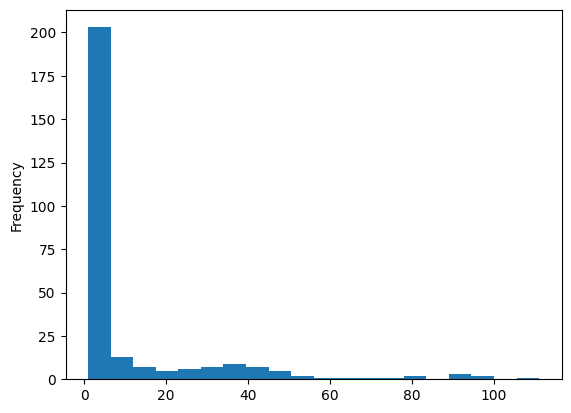

In [11]:
# Plot histogram
df["delivery_time_days"].plot.hist(bins=20)

In [12]:
# Discretize using pd.cut(), NaN values will be binned into NaN category by default
max_time = df["delivery_time_days"].max()
df["delivery_time_days_discrete"] = pd.cut(df["delivery_time_days"], 
                                           bins=[0, 5, max_time], 
                                           labels=["<=5d", ">5d"])
df["delivery_time_days_discrete"]

1      <=5d
2      <=5d
3      <=5d
4       NaN
5      <=5d
       ... 
295    <=5d
296     >5d
297    <=5d
298    <=5d
299    <=5d
Name: delivery_time_days_discrete, Length: 281, dtype: category
Categories (2, object): ['<=5d' < '>5d']

<AxesSubplot:xlabel='delivery_time_days_discrete'>

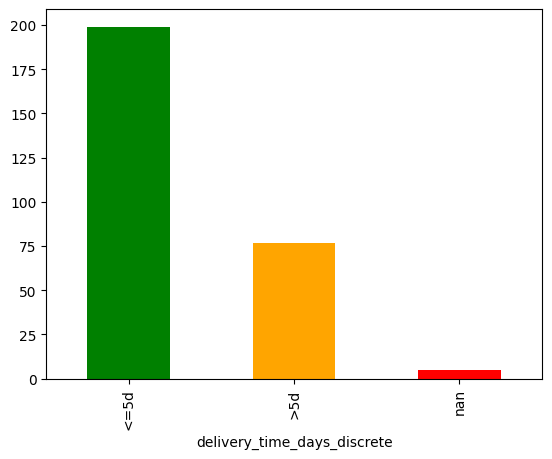

In [13]:
# Plot bar chart
df["delivery_time_days_discrete"].value_counts(sort=False, dropna=False).plot.bar(color=["green", "orange", "red"])

##### 8. Compute the correlation matrix for the numerical attributes. Plot the matrix of the scatterplots. Plot the heatmap of the correlation matrix.

In [14]:
# Correlation matrix of dataframe
corr = df.corr(numeric_only=True)
print(corr)

                          ID     price       tax  order_date_weekday  \
ID                  1.000000  0.045780  0.045780            0.003700   
price               0.045780  1.000000  1.000000           -0.092800   
tax                 0.045780  1.000000  1.000000           -0.092800   
order_date_weekday  0.003700 -0.092800 -0.092800            1.000000   
order_date_day     -0.001640 -0.032473 -0.032471            0.036414   
order_date_month   -0.354589  0.073723  0.073726           -0.045735   
order_date_year     0.851271 -0.002239 -0.002241            0.025237   
order_date_quarter -0.427737  0.079797  0.079800           -0.055783   
delivery_time_days  0.235469  0.062649  0.062648           -0.034125   

                    order_date_day  order_date_month  order_date_year  \
ID                       -0.001640         -0.354589         0.851271   
price                    -0.032473          0.073723        -0.002239   
tax                      -0.032471          0.073726        

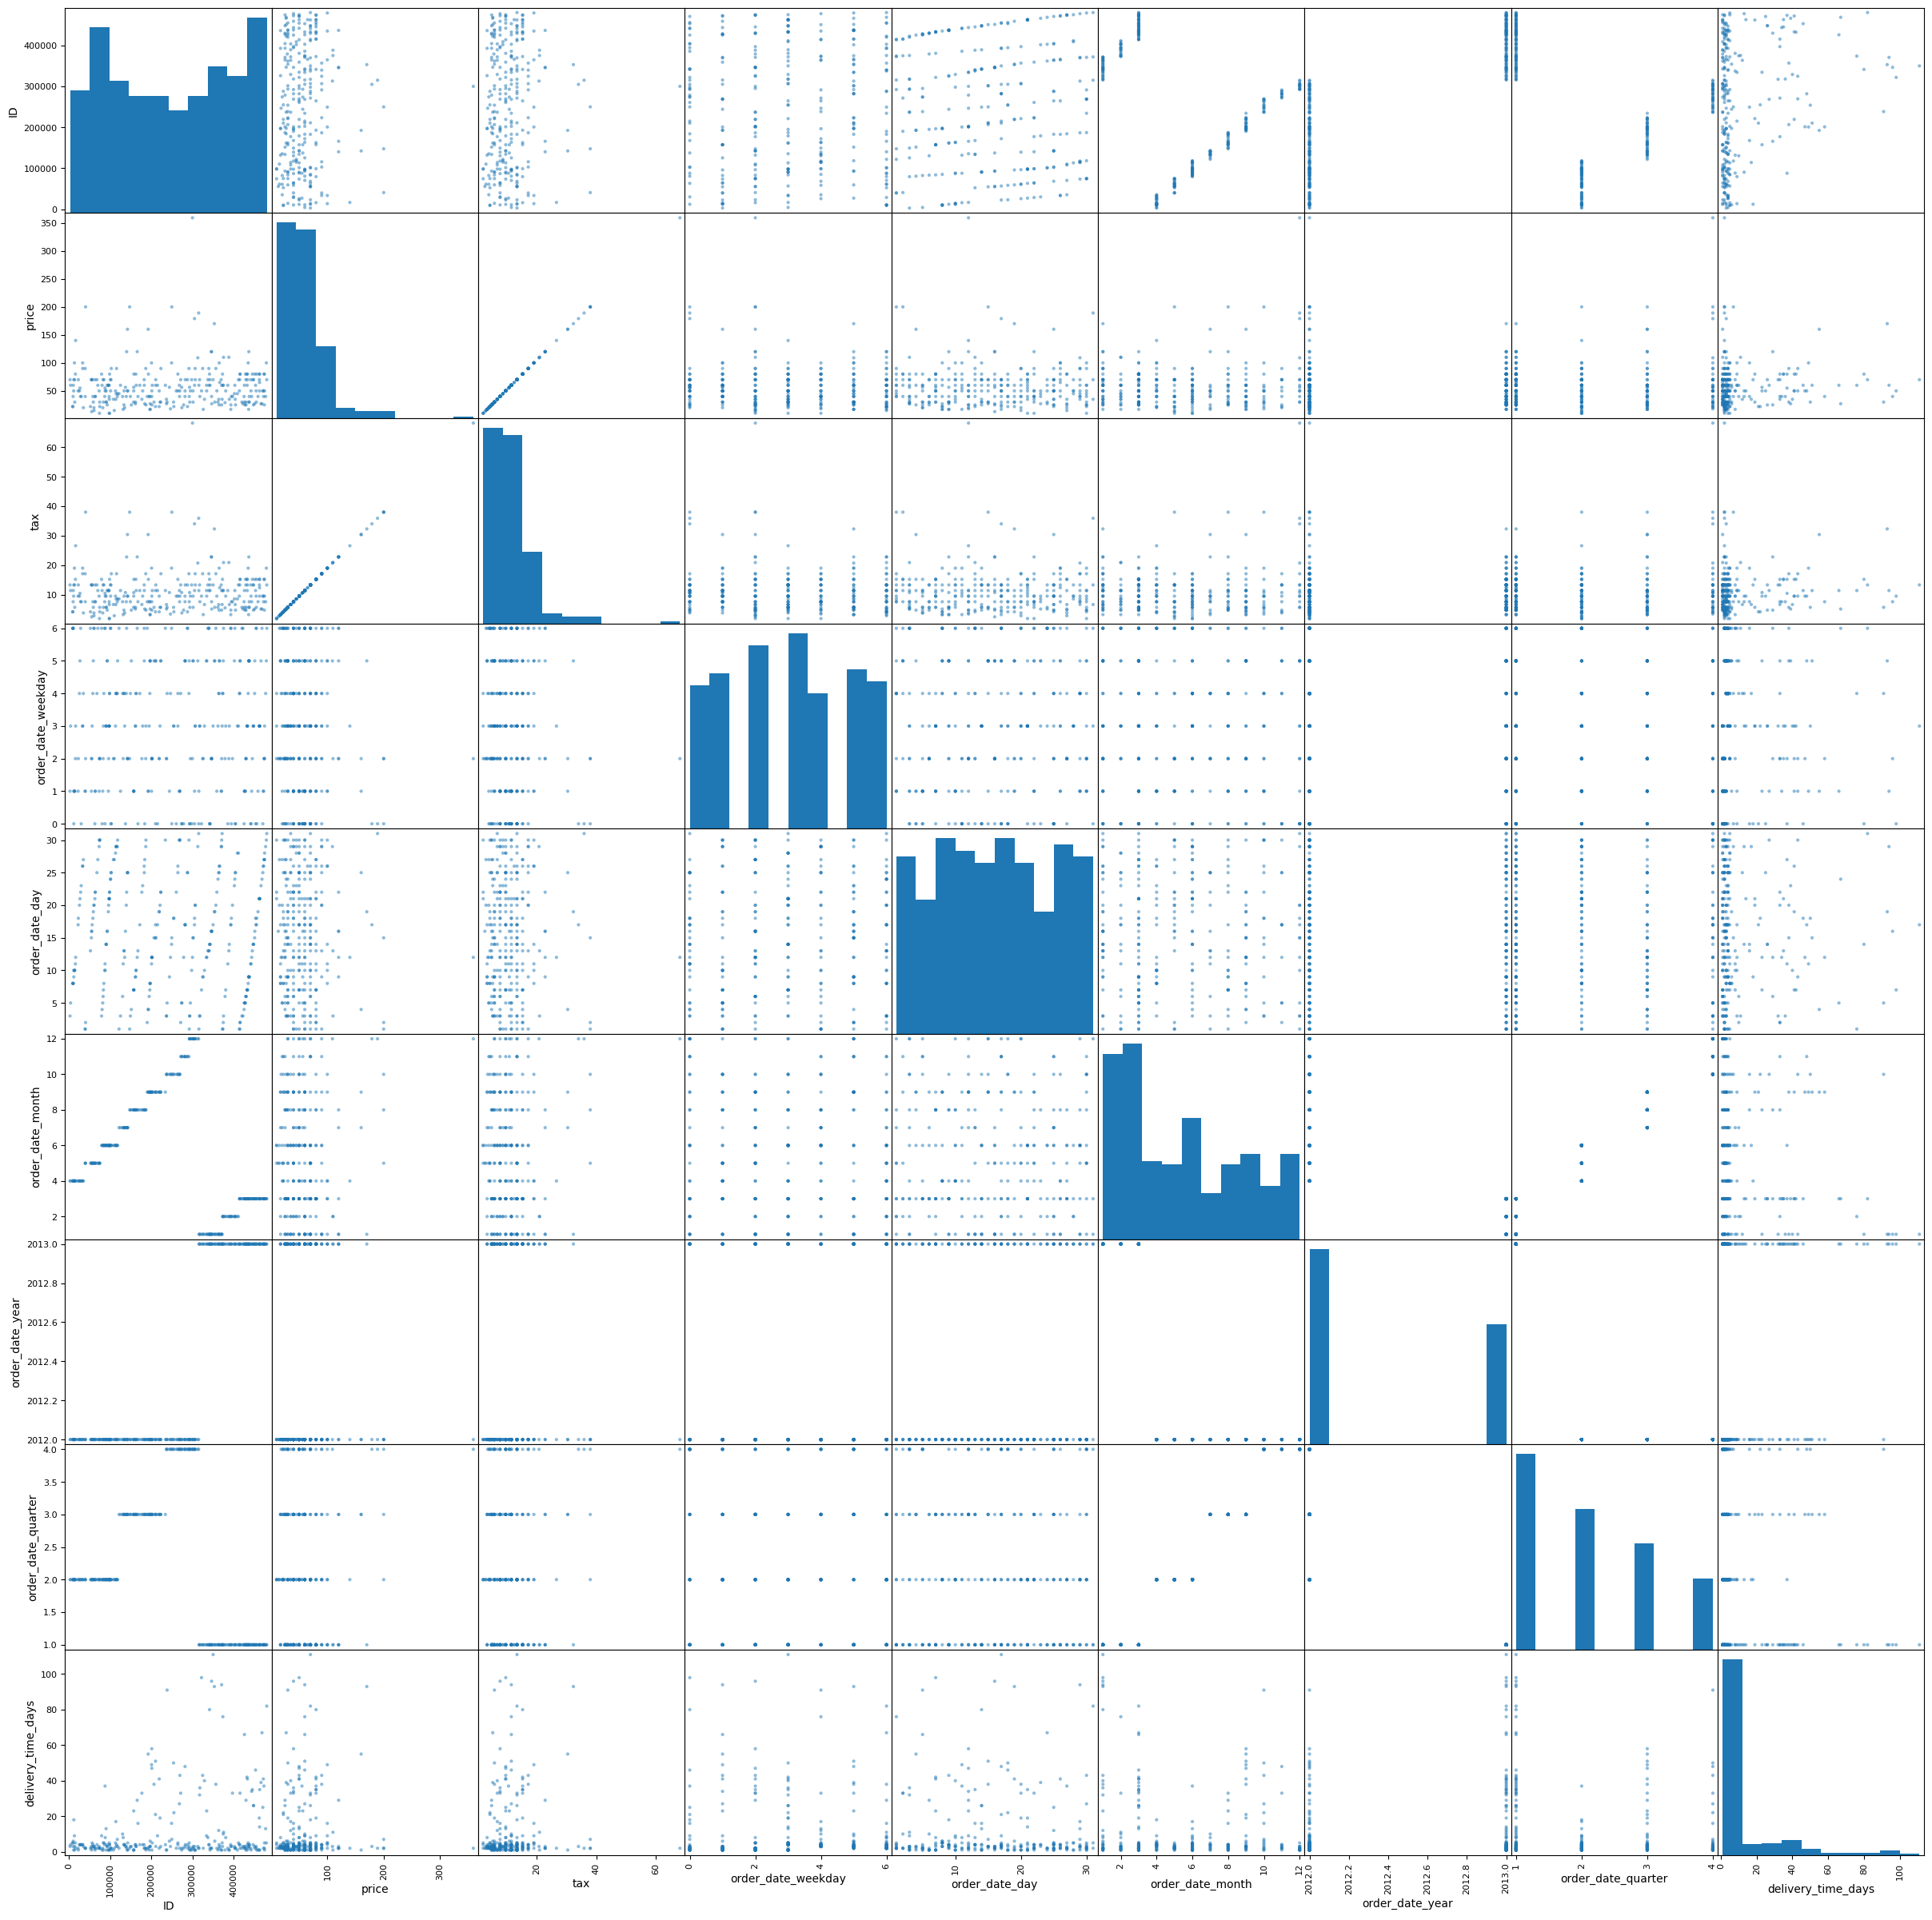

In [15]:
# Plot scatter matrix
matrix_of_scatter_plots = pd.plotting.scatter_matrix(df, figsize=(30,30))

In [16]:
# Compute correlation matrix of standardized data
df_only_numerical = df.select_dtypes(include="number")
df_normalized = (df_only_numerical - df_only_numerical.mean()) / df_only_numerical.std()
corr_normalized = df_normalized.corr()

In [17]:
print("Corporate needs you to find the differences between corr matrix and corr_normalized matrix.")

difference = corr - corr_normalized
if (difference < 1e-8).all().all():
    print("--> They're the same matrix.")

Corporate needs you to find the differences between corr matrix and corr_normalized matrix.
--> They're the same matrix.
